In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:xlabel='Outcome', ylabel='count'>

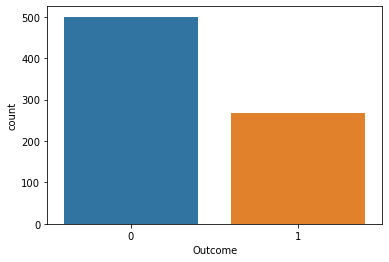

In [7]:
sns.countplot(x = 'Outcome',data = diabetes_data)

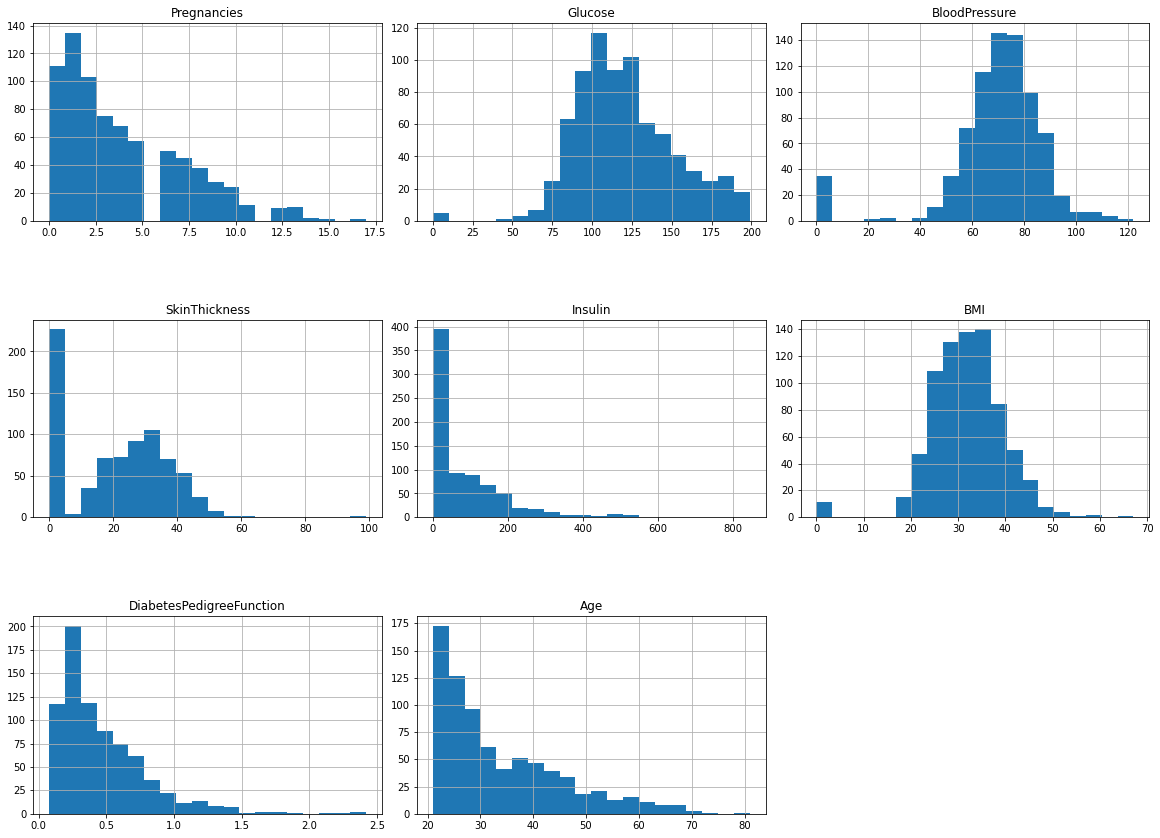

In [8]:
import itertools

new_col = diabetes_data.columns[:8]
plt.subplots(figsize = (20, 20))
new_length = len(new_col)

for i, j in itertools.zip_longest(new_col, range(new_length)):
    plt.subplot((new_length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    diabetes_data[i].hist(bins = 20)
    plt.title(i)
plt.show()

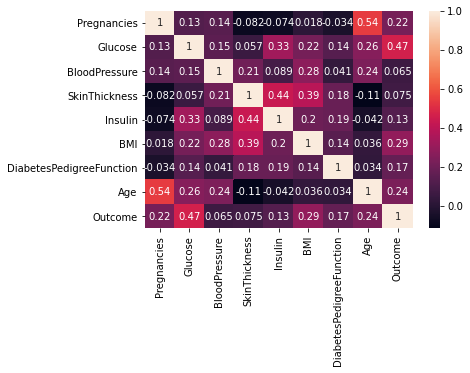

In [9]:
sns.heatmap(diabetes_data.corr(), annot = True)
plt.show()

In [24]:
d_data = diabetes_data
d_data[["Glucose","Insulin","BMI"]] = d_data[["Glucose","Insulin","BMI"]].replace(0, np.NaN)
d_data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure               False
SkinThickness               False
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [25]:
d_data["Glucose"].fillna(d_data["Glucose"].mean(), inplace = True)
d_data["Insulin"].fillna(d_data["Insulin"].mean(), inplace = True)
d_data["BMI"].fillna(d_data["BMI"].mean(), inplace = True)

In [26]:
min_max_sc = MinMaxScaler(feature_range = (0, 1))
diabetes_data_scaled = min_max_sc.fit_transform(d_data)

In [27]:
new_data = pd.DataFrame(diabetes_data_scaled)

In [28]:
new_data.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.590164,0.353535,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.540984,0.292929,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.524590,0.000000,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.540984,0.232323,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.327869,0.353535,0.185096,0.509202,0.943638,0.200000,1.0


In [29]:
diabetes_X = new_data.iloc[:, [1, 4, 5, 7]].values
diabetes_Y = new_data.iloc[:,8].values

In [36]:
dia_X_trn, dia_X_tst, dia_Y_trn, dia_Y_tst = train_test_split(diabetes_X, diabetes_Y, test_size = 0.20, random_state = 42, stratify = d_data['Outcome'] )

In [37]:
reg_log = LogisticRegression(random_state = 42)
reg_log.fit(dia_X_trn,dia_Y_trn)

LogisticRegression(random_state=42)

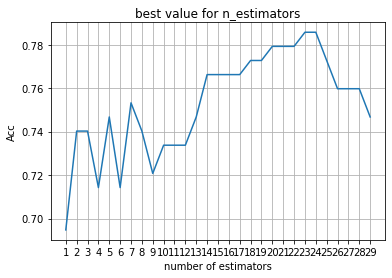

value:  0.7857142857142857


In [47]:
new_axis = list(range(1,30))
accuracy = pd.Series()
new_x = range(1,30)

for i in list(range(1,30)):
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(dia_X_trn, dia_Y_trn)
    predict = knn.predict(dia_X_tst)
    accuracy = accuracy.append(pd.Series(metrics.accuracy_score(predict, dia_Y_tst)))
plt.plot(new_axis, accuracy)
plt.xticks(new_x)
plt.title("best value for n_estimators")
plt.xlabel("number of estimators")
plt.ylabel("Acc")
plt.grid()
plt.show()
print('value: ',accuracy.values.max())

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 24,metric = 'euclidean',p = 2)
knn_model.fit(dia_X_trn, dia_Y_trn)

KNeighborsClassifier(metric='euclidean', n_neighbors=24)

In [54]:
svc_model = SVC(kernel = 'linear', random_state = 42)
svc_model.fit(dia_X_trn, dia_Y_trn)

SVC(kernel='linear', random_state=42)

In [55]:
nb_model = GaussianNB()
nb_model.fit(dia_X_trn, dia_Y_trn)

GaussianNB()

In [56]:
dec_tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dec_tree_model.fit(dia_X_trn, dia_Y_trn)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [58]:
ran_forest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
ran_forest.fit(dia_X_train, dia_Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

In [60]:
pred_reg_log = reg_log.predict(dia_X_tst)
pred_knn_model = knn_model.predict(dia_X_tst)
pred_svc_model = svc_model.predict(dia_X_test)
pred_nb_model = nb_model.predict(dia_X_tst)
pred_dec_tree_model = dec_tree_model.predict(dia_X_tst)
pred_ran_forest = ran_forest.predict(dia_X_tst)

In [61]:
acc_reg_log= accuracy_score(dia_Y_tst, pred_reg_log)
acc_knn_model = accuracy_score(dia_Y_tst, pred_knn_model)
acc_svc_model = accuracy_score(dia_Y_tst, pred_svc_model)
acc_nb_model = accuracy_score(dia_Y_tst, pred_nb_model)
acc_dec_tree_model = accuracy_score(dia_Y_tst, pred_dec_tree_model)
acc_ran_forest = accuracy_score(dia_Y_tst, pred_ran_forest)

In [62]:
print("Log Regression: " + str(acc_reg_log * 100))
print("KNN: " + str(acc_knn_model * 100))
print("SVC: " + str(acc_svc_model * 100))
print("NB: " + str(acc_nb_model * 100))
print("Decision_tree: " + str(acc_dec_tree_model * 100))
print("Random Forest: " + str(acc_ran_forest * 100))

Log Regression: 72.07792207792207
KNN: 78.57142857142857
SVC: 73.37662337662337
NB: 71.42857142857143
Decision_tree: 68.18181818181817
Random Forest: 72.07792207792207


In [63]:
matrix = confusion_matrix(dia_Y_tst,pred_knn_model)
matrix

array([[87, 13],
       [20, 34]], dtype=int64)

<AxesSubplot:>

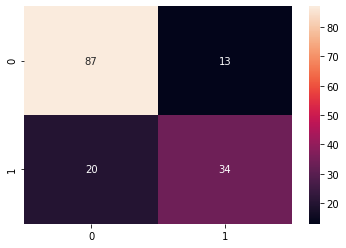

In [65]:
sns.heatmap(pd.DataFrame(matrix), annot=True)

In [66]:
print(classification_report(dia_Y_tst, pred_knn_model))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [68]:
pickle.dump(knn_model,open('dia_model.pkl','wb'))